# 금리계산 관련 기초 코딩방법
경영학과 함께하는 파이썬 인공지능

In [9]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

# 필요한 패키지 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 만기일에서 풋옵션의 투자수익
미래의 만기일 또는 만기일내에 미리 정해진 가격(행사가격)을 수령하고 특정한 자산(기초자산)을 매도할 수 있는 권리

In [2]:
strike = 10000 #풋옵션 행사가격
stock_price=int(input('만기일 주가: '))
if stock_price < strike:
    payoff = strike - stock_price
else:
    payoff = 0
print('풋옵션 행사 수익은', str(payoff)+'원입니다.')

만기일 주가: 9000
풋옵션 행사 수익은 1000원입니다.


## 월복리 정기적금의 세전원리금 계산

In [5]:
install = int(input('월적립액 입력: '))
rate = float(input('연이자율 입력: '))
maturity = int(input('만기(개월수로) 입력 '))
total = 0
for month in range(maturity, 0, -1):
    fv = install * (1 + rate/12)**month
    total = total + fv
print('세전 원리금: ', format(total, ',.0f'))

월적립액 입력: 10000
연이자율 입력: 0.036
만기(개월수로) 입력 36
세전 원리금:  380,697


## 연금의 현재가치

In [6]:
cash = int(input('월 연금액: '))
rate = float(input('연 이자율: '))
numbers = int(input('총 연금횟수: '))
num_per_year = int(input('연간 연금횟수: '))
total = 0
for month in range(1, numbers+1):
    pv = cash / (1 + rate / num_per_year)**month
    total = total + pv
print('연금월액의 현재가치 : ', format(total,',.0f'))

월 연금액: 832000
연 이자율: 0.015
총 연금횟수: 120
연간 연금횟수: 12
연금월액의 현재가치 :  92,659,105


## 준분산
투자공학에서 투자의 손실위험(downside risk)을 측정하기위해 사용되는 개념임.<br>
※ 수치자료의 값들 중에서 표본평균보다 작은 범위에 얼마나 흩어져 있는 지를 나타내는 기술통계량

In [8]:
x = [1,5,6,2,4,6,2,7]
total = 0
for num in x:
    total = total + num
average = total/len(x)
dev_total = 0 # 평균값보다 작은 x의 원소값과 평균의 차이를 aggregation하기위한 변수
dev_num = 0   # 리스트 x의 요소 중 평균보다 작은 요소의 갯수를 계산하는 변수
for num in x:
    if num < average:
        dev = (num - average)**2
        dev_num += 1
    else:
        dev = 0
    dev_total += dev
variance = dev_total / (dev_num - 1) # 표본분산을 구하는 공식
print('평균: ', format(average, ',.02f'))
print("준 분산 계산결과: ", format(variance, ',.02f'))
print('평균보다 작은 숫자의 객수: ', dev_num)

평균:  4.12
준 분산 계산결과:  6.27
평균보다 작은 숫자의 객수:  4


## 콜옵션의 투자수익 계산
미래의 일정시점(만기일, 행사일)에 미리 정해진 가격(행사가격)을 지불하고 특정한 자산(기초자산)을 매입할 수 있는 권리

[0, 0, 0, 0, 0, 0, 100, 200, 300, 400, 500]


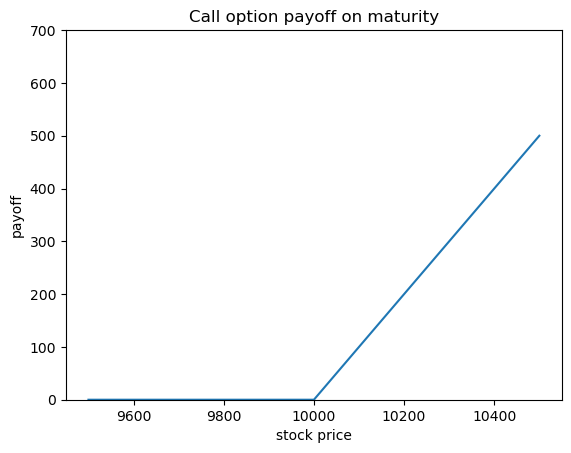

In [10]:
strike = 10000
stock_price = list(range(9500, 10600, 100)) #만기일 주가 리스트
L = len(stock_price)
payoff = []
for i in range(0, L):
    if stock_price[i] > strike:
        cash = -strike + stock_price[i]
    else:
        cash = 0
    payoff.append(cash)

print(payoff)
plt.plot(stock_price, payoff)
plt.xlabel("stock price")
plt.ylabel('payoff')
plt.title('Call option payoff on maturity')
plt.ylim(0, 700)
plt.show()

## 효용함수(power function의 경우) 그래프

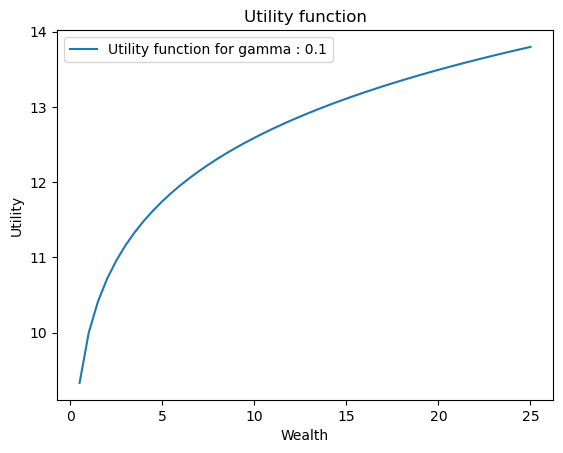

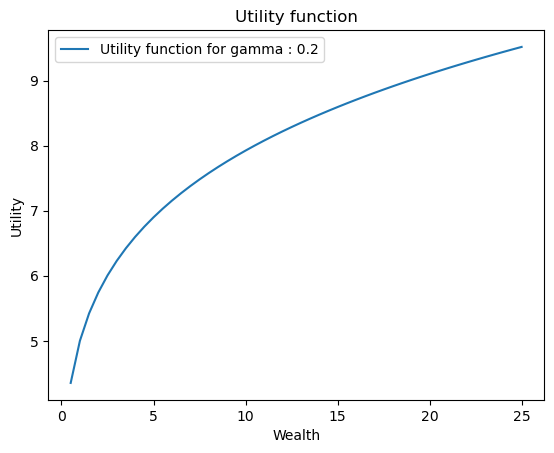

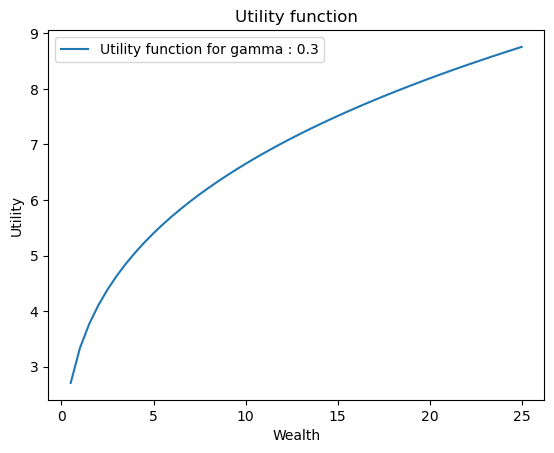

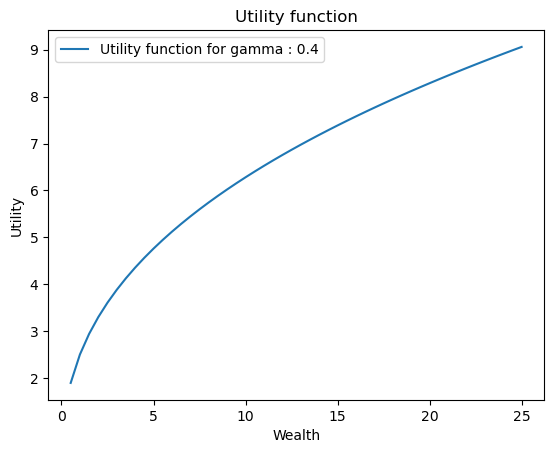

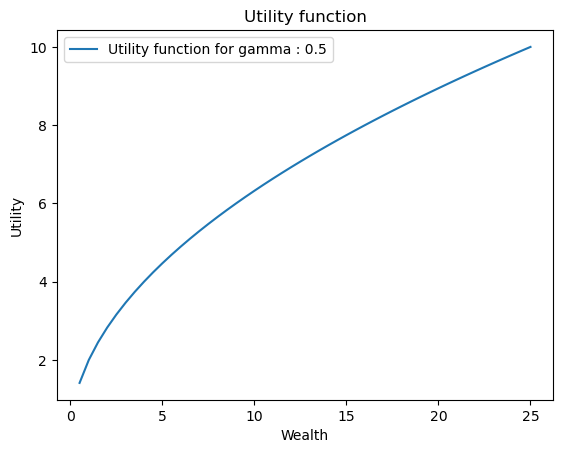

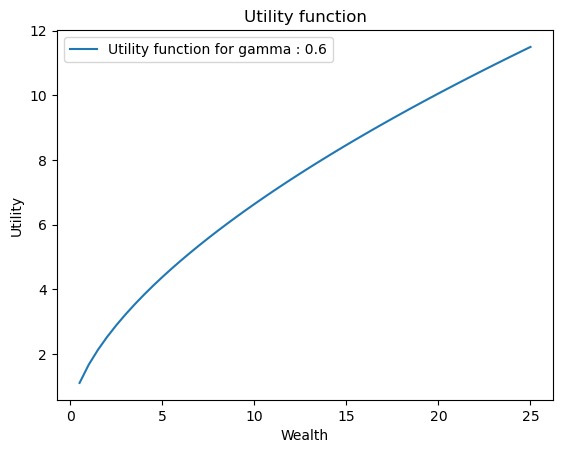

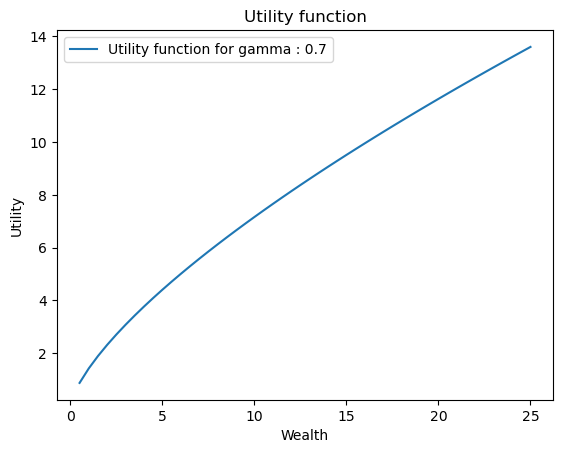

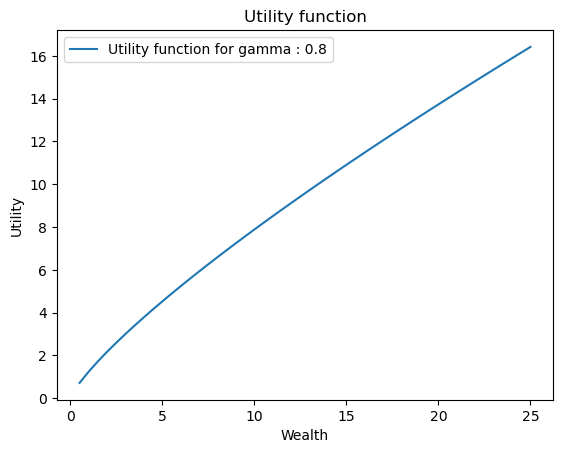

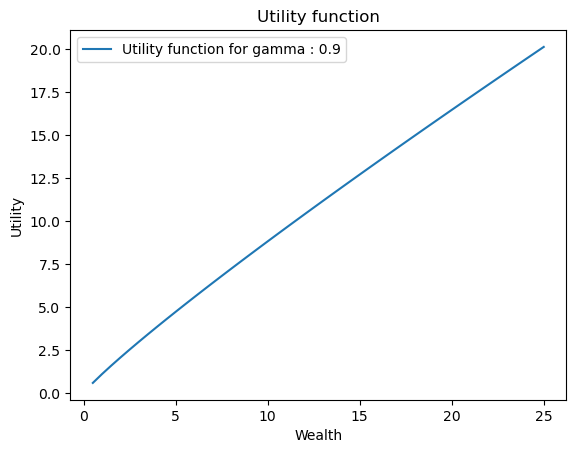

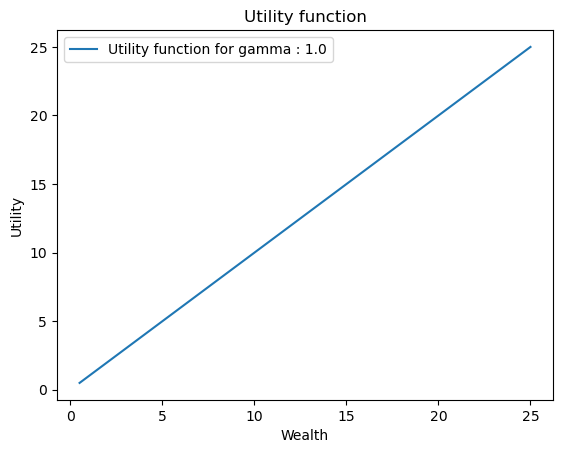

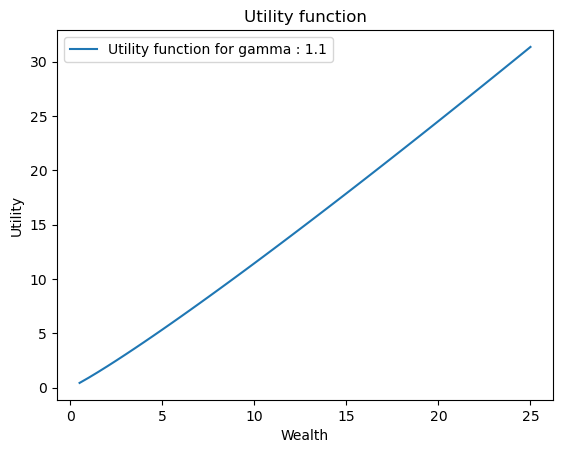

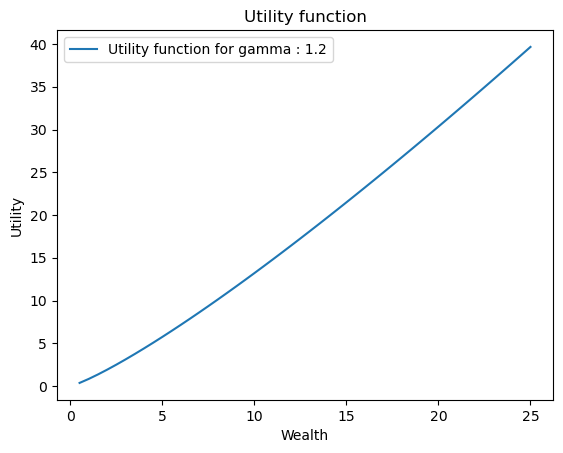

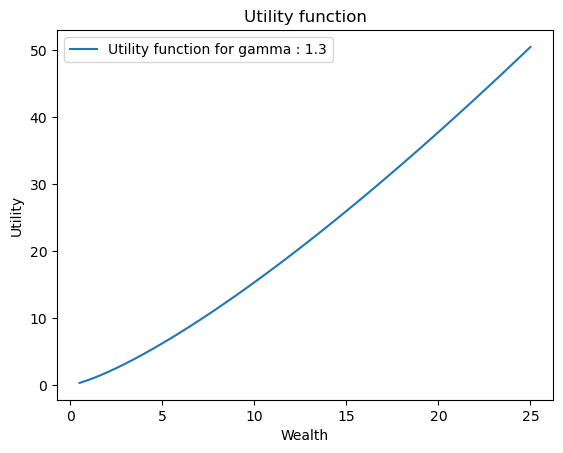

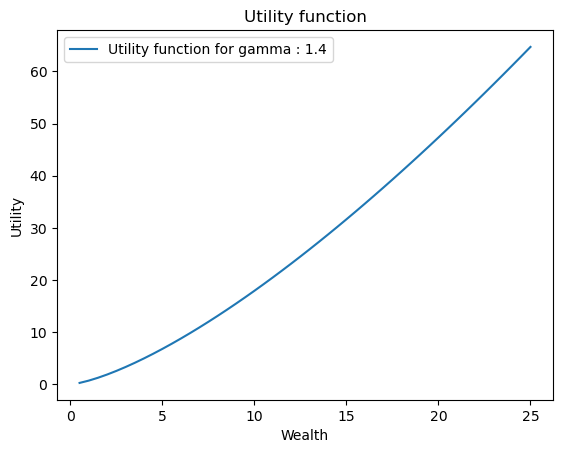

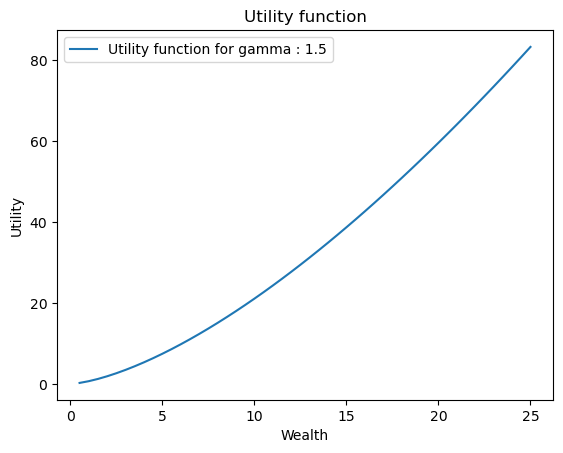

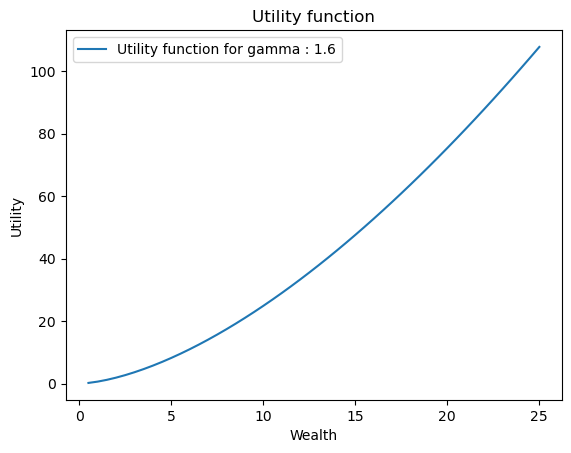

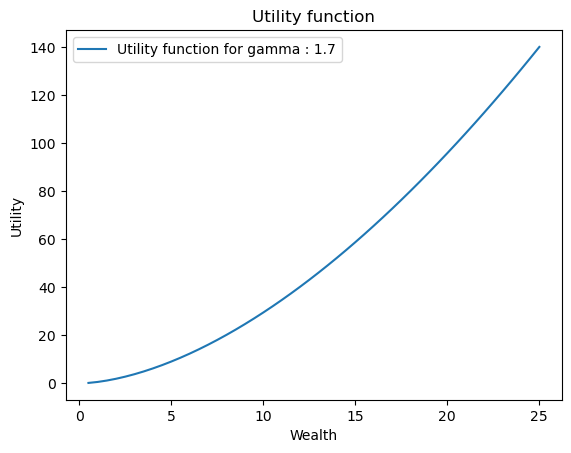

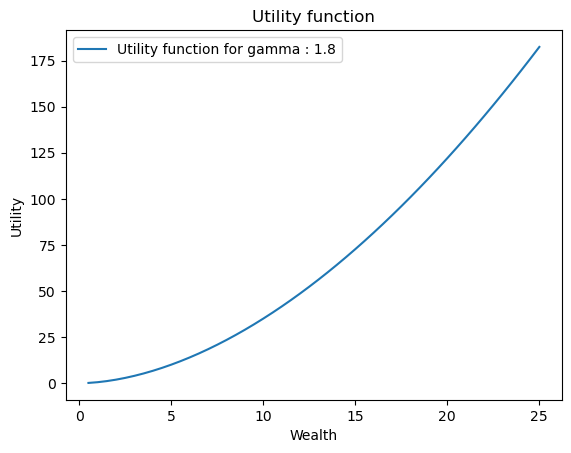

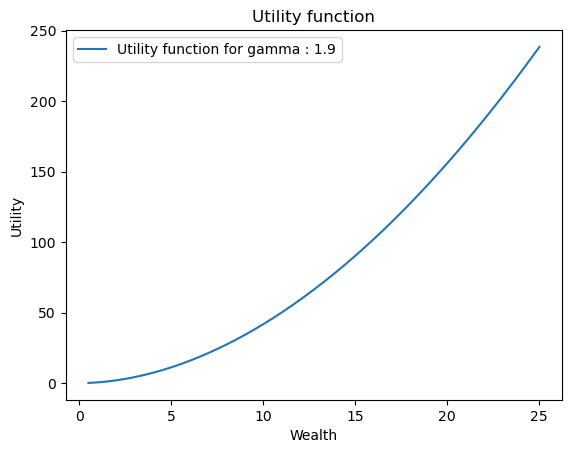

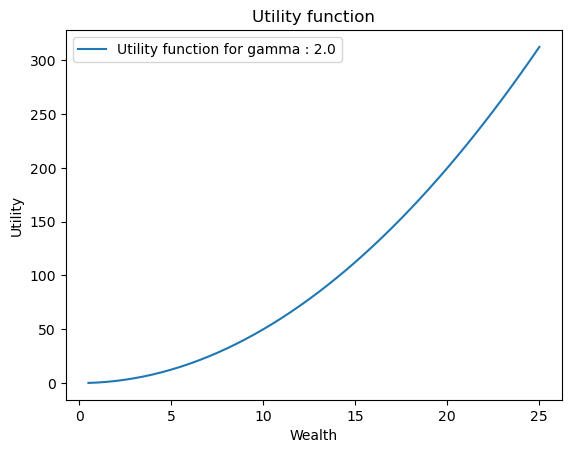

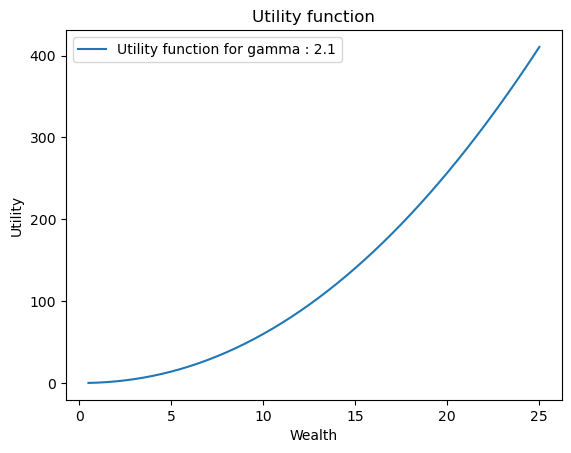

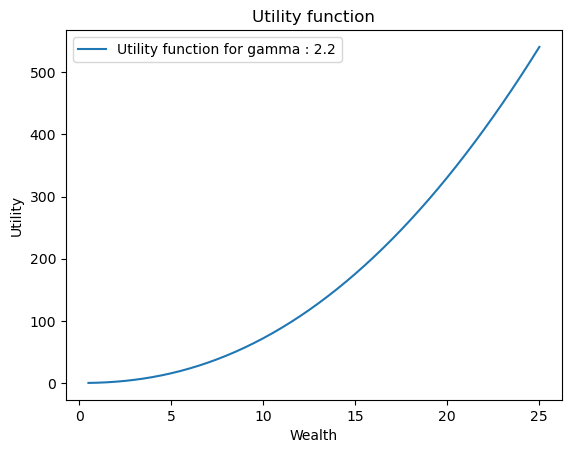

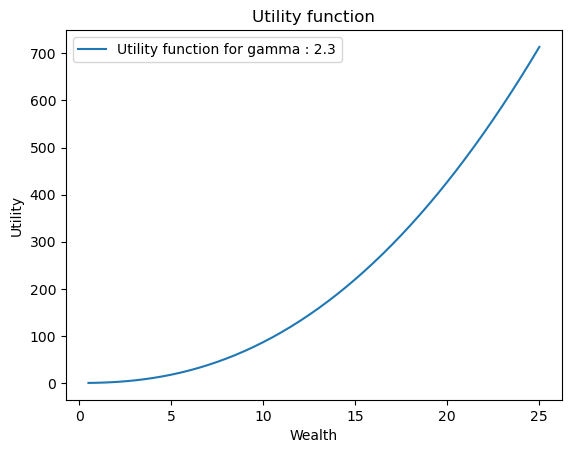

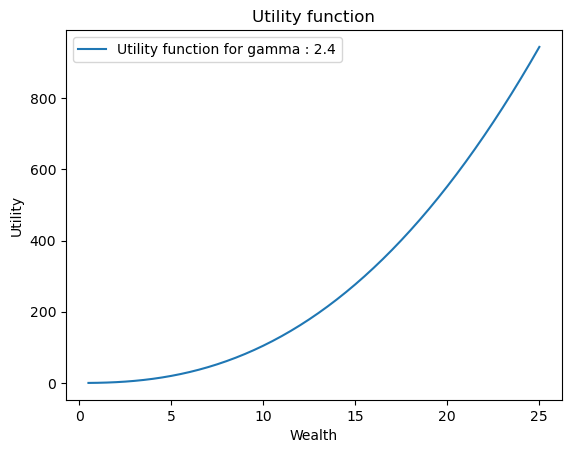

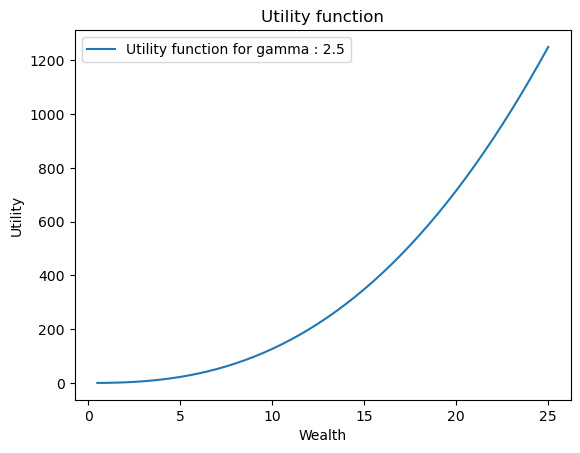

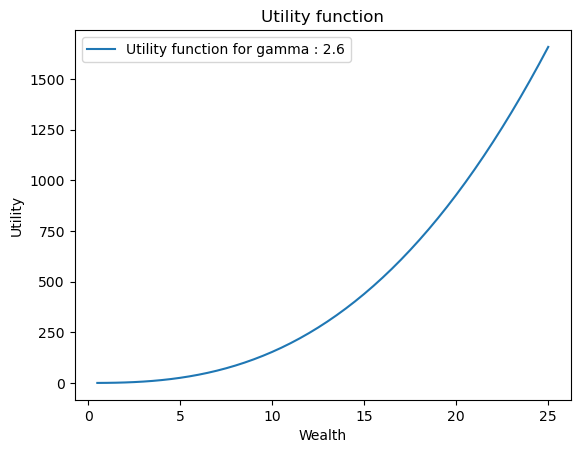

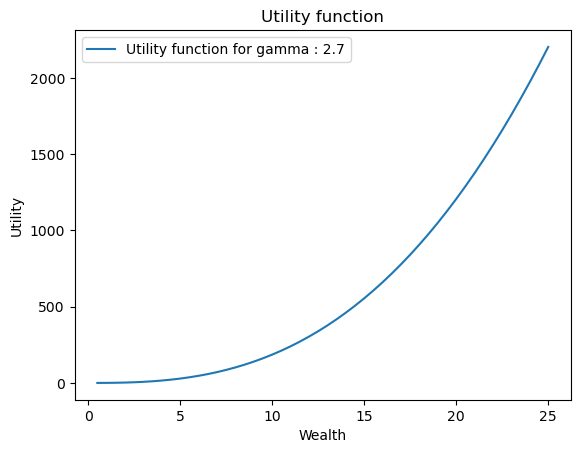

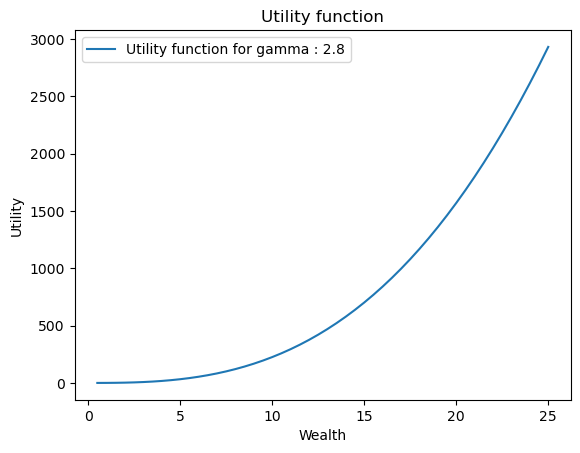

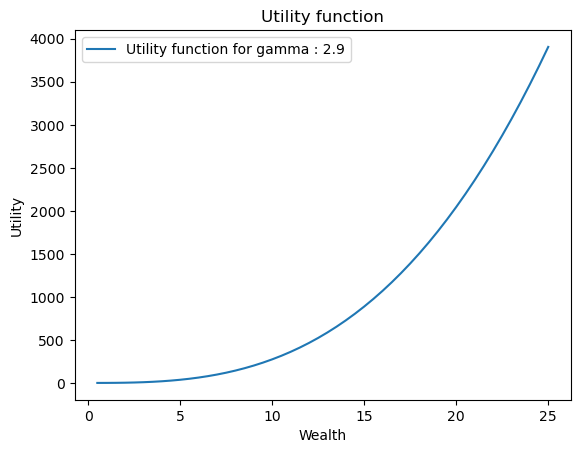

In [21]:
z = 0
zs = []
for i in range(50):
    z = z + 0.5 # z: consumption
    zs.append(z)
gamma = np.arange(0.1, 3, 0.1)

for gam_k in gamma:
    ys = []
    for num in zs:
        y = (1/gam_k) * (num ** gam_k)
        ys.append(y)

    plt.plot(zs, ys, label='Utility function for gamma : ' + str(format(gam_k,',.01f')))
    plt.xlabel('Wealth')
    plt.ylabel('Utility')
    plt.title('Utility function')
    plt.legend()
    plt.show()

## 단리 정기적금의 세전 원리금 계산

In [22]:
install = int(input('월적립액 입력: '))
rate = float(input('연이자율 입력: '))
maturity = int(input('만기(개월수로) 입력 '))
total = 0
for month in range(maturity, 0, -1):
    fv = install * (1 + rate/12*month)
    total = total + fv
print('단리 정기적금의 세전 원리금: ', format(total, ',.0f'))

월적립액 입력: 10000
연이자율 입력: 0.024
만기(개월수로) 입력 36
단리 정기적금의 세전 원리금:  373,320


## 단리 정기예금의 원리금

In [23]:
def calc_sum(deposit, rate, maturity): # 예금금액, 연이자율, 예금기간(년)
    before_total = deposit * (1 + rate * maturity)
    print(format(before_total, '.0f'))
calc_sum(10000, 0.036, 3) # 예금금액, 연이자율, 예금기간(년)

11080


## 연금의 미래가치 계산

In [25]:
# A: 연금액, r: (연)이자율, n: 연금횟수, m: (연간)연금지급횟수
def future_value(A, r, n, m):
    total = 0
    for month in range(n-1, -1, -1):
        fv = A * (1 + r/m) ** month
        total = total + fv
    print('연금의 미래 가치 : ', format(total, ',.0f'))
    
future_value(A=100, r=0.036, n = 24, m=12)

연금의 미래 가치 :  2,485


## 원리금 균등분할상환방식 대출의 월상환액

In [29]:
# principal: 원금, rate:(연)이자율, maturity: 만기(년)
def mortgage(principal, rate, maturity):
    payment = (principal*(rate/12)) / (1-(1/(1 + (rate / 12)) ** (maturity * 12)))
    begBal = principal
    for num in range(1, maturity * 12 + 1):
        interest = begBal * (rate / 12)
        principalpay = payment - interest
        endBal = begBal - principalpay
        print(num, '\t',
            format(begBal, '8,.0f'), '\t',
            format(payment, '8,.0f'), '\t',
            format(interest, '8,.0f'), '\t',
            format(principalpay, '8,.0f'), '\t',
            format(endBal, '8,.0f'))
        begBal = endBal
        
print("회차",'\t','기초원금','\t','월상환액','\t','이자', '\t', '\t', '상환원금', '\t', '기말원금')
print('---------------------------------------------------------------------------------------')
mortgage(1000000, 0.036, 1)

회차 	 기초원금 	 월상환액 	 이자 	 	 상환원금 	 기말원금
---------------------------------------------------------------------------------------
1 	 1,000,000 	   84,967 	    3,000 	   81,967 	  918,033
2 	  918,033 	   84,967 	    2,754 	   82,213 	  835,820
3 	  835,820 	   84,967 	    2,507 	   82,460 	  753,360
4 	  753,360 	   84,967 	    2,260 	   82,707 	  670,653
5 	  670,653 	   84,967 	    2,012 	   82,955 	  587,697
6 	  587,697 	   84,967 	    1,763 	   83,204 	  504,493
7 	  504,493 	   84,967 	    1,513 	   83,454 	  421,039
8 	  421,039 	   84,967 	    1,263 	   83,704 	  337,335
9 	  337,335 	   84,967 	    1,012 	   83,955 	  253,380
10 	  253,380 	   84,967 	      760 	   84,207 	  169,173
11 	  169,173 	   84,967 	      508 	   84,460 	   84,713
12 	   84,713 	   84,967 	      254 	   84,713 	       -0


## 이표채
만기일까지 일정한 금액의 이표를 일정한 기간(3개월, 6개월 등)마다 이표채 보유자에게 지급하고, 만기일이 되면 액면가와 마지막 이표를 지급